In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load the dataset
df = pd.read_csv('train.csv')

In [3]:
# Step 1: Separate Numerical and Categorical Columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [4]:
# Step 2: Handle Missing Values
# Fill missing values for numerical features with the median
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Fill missing values for categorical features with the mode
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [5]:
# Step 3: One-Hot Encode Categorical Variables
df = pd.get_dummies(df, drop_first=True)


In [6]:
# Step 4: Feature Engineering (optional)
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df['HouseAge'] = df['YrSold'] - df['YearBuilt']

# Drop less useful columns (e.g., IDs or features with very low variance)
df.drop(['Id', 'YearBuilt', 'YrSold'], axis=1, inplace=True)


In [7]:
# Step 5: Separate Features and Target Variable
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']


In [8]:
# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Step 7: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
# Step 8: Model Selection and Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [11]:
# Step 9: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Root Mean Squared Error: 29973.213928324123
R-squared: 0.8828741400396655


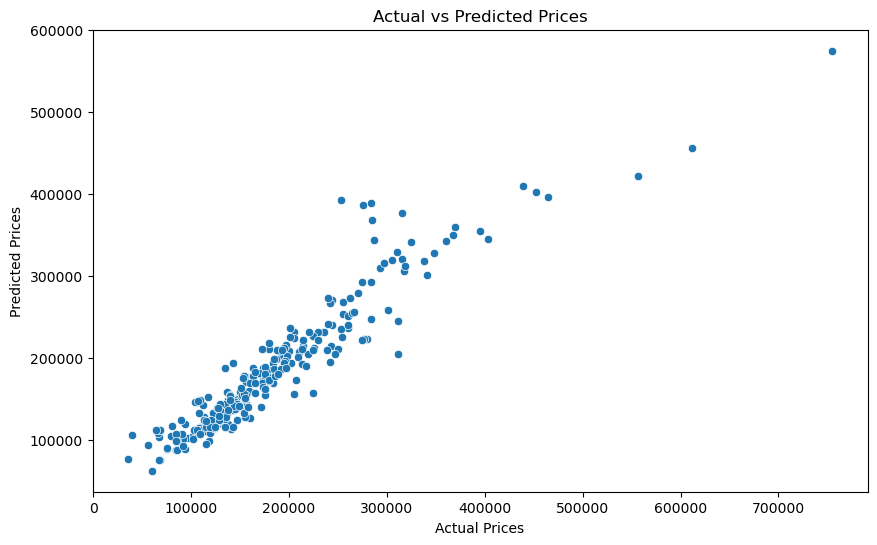

In [12]:
# Step 10: Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

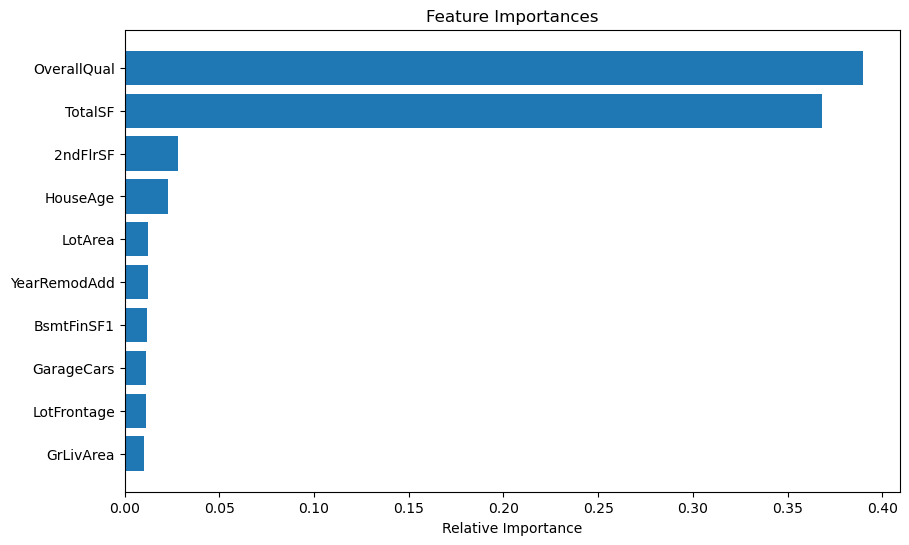

In [13]:
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


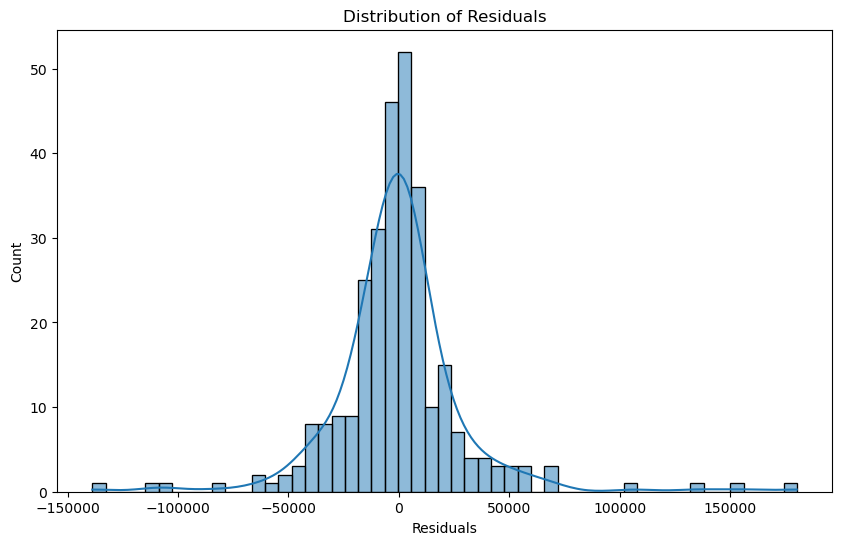

In [14]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()